In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')

In [4]:
final = {}

groups = ttc.groupby(['Line'], as_index=False)
for title, g in groups:
   final[title] = g.groupby('Code Description').size().sort_values(ascending=False).head(5)

df = pd.DataFrame(final)
df

,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Disorderly Patron,1390.0,NaN,NaN,NaN
Door Problems - Faulty Equipment,NaN,262.0,NaN,NaN
Injured or ill Customer (In Station) - Transported,1951.0,NaN,NaN,1916.0
Miscellaneous General Delays,1714.0,NaN,NaN,2311.0
Miscellaneous Other,NaN,409.0,151.0,NaN
Miscellaneous Speed Control,8848.0,NaN,534.0,4349.0
OPTO (COMMS) Train Door Monitoring,NaN,NaN,114.0,NaN
Operator Overspeeding,5812.0,NaN,363.0,4012.0
Operator Violated Signal,NaN,NaN,135.0,NaN
Passenger Assistance Alarm Activated - No Trouble Found,NaN,NaN,NaN,3693.0


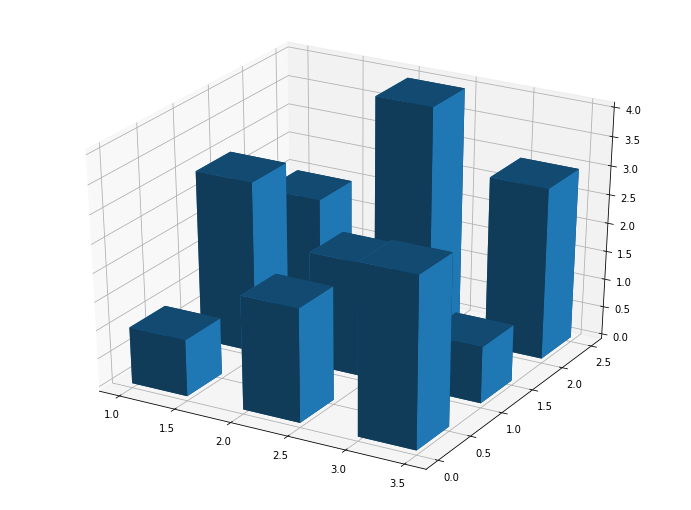

In [5]:
xpos=np.arange(df.shape[0])
ypos=np.arange(df.shape[1])
yposM, xposM = np.meshgrid(ypos+0.5, xpos+0.5)
zpos=np.zeros(df.shape).flatten()

dx = 0.5 * np.ones_like(zpos)
dy= 0.1 * np.ones_like(zpos)
dz=df.values.ravel()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

values = np.linspace(0.2, 1., xposM.ravel().shape[0])
# colors = cm.rainbow(values)


x = [1,2,3,1,2,3,1,2,3]
y = [0,0,0,1,1,1,2,2,2]
z = np.zeros(9)
height = [1,2,3,3,2,1,2,4,3]

ax.bar3d(x,y,z,0.5,0.5, height)
# ax.bar3d(xposM.ravel(),yposM.ravel(),zpos,dx,dy,dz, alpha=0.5)

# ticks_x = np.arange(0.5, 24, 1)
# ax.set_xticks(ticks_x)
# ticks_y=np.arange(0.6,3,1)
# ax.set_yticks(ticks_y)

# ax.w_xaxis.set_ticklabels(df.index)
# ax.w_yaxis.set_ticklabels(df.columns)

# ax.set_xlabel('Hora')
# ax.set_ylabel('B')
# ax.set_zlabel('Occurrence')
# plt.xticks(['One', 'Two', 'Three'])
# fig.autofmt_xdate()
plt.show()

In [6]:
# https://python-graph-gallery.com/seaborn/

SyntaxError: invalid syntax (<ipython-input-6-849c1af326dc>, line 1)

In [ ]:
zero_df

In [ ]:
zero_df = df.fillna(0)
# zero_df.shape # 13,4

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

x = np.tile(np.arange(1,14), 4)
y = np.tile(np.arange(1,5), 13)
z = np.zeros(13*4)
height = np.append(zero_df['Bloor-Danforth'].values, [zero_df['Scarborough RT'].values, zero_df['Sheppard'].values, zero_df['Yonge-University'].values])


colors = ['#2b720a', '#0a6797', '#8b1962', '#FFD700']*13
alpha = 0.80
ax.bar3d(x,y,z,0.5,0.5, height, color=colors, alpha=alpha)


plt.show()

In [8]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour

In [45]:
ct = pd.crosstab(ttc.Hour, ttc.Line, normalize='columns')
line_names = ttc['Line'].dropna().unique()
line_names.sort()
ct.head()

Line,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Hour,,,,
0,0.029394,0.025035,0.039777,0.028712
1,0.025268,0.023625,0.032342,0.022491
2,0.011326,0.009520,0.024164,0.009092
3,0.002912,0.007052,0.002602,0.003589
4,0.002049,0.004584,0.002974,0.002811


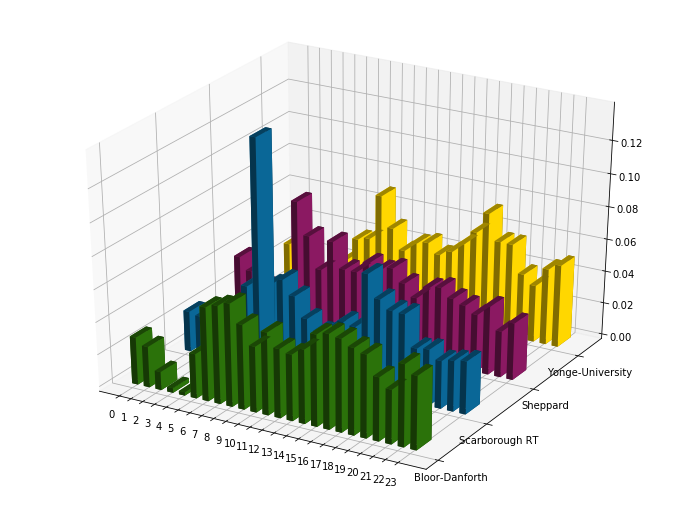

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
        10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3]))

In [50]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

ct.shape #(24, 4)
x_num = ct.shape[0]
y_num = ct.shape[1]


x = np.tile(np.arange(0,x_num), y_num)
y = np.repeat(np.arange(0,y_num), x_num)
z = np.zeros(x_num*y_num)
height = np.append(ct['Bloor-Danforth'].values, [ct['Scarborough RT'].values, ct['Sheppard'].values, ct['Yonge-University'].values])
# height = np.append(ct['Bloor-Danforth'].values, [ct['Bloor-Danforth'].values, ct['Bloor-Danforth'].values, ct['Bloor-Danforth'].values])


colors = ['#2b720a'] * x_num + ['#0a6797'] * x_num + ['#8b1962'] * x_num + ['#FFD700'] *x_num
alpha = 0.80
ax.bar3d(x,y,z,0.5,0.3, height, color=colors, alpha=alpha)
ax.set_xticks(np.arange(0,x_num))
ax.set_yticks(np.arange(0,y_num))
ax.set_yticklabels(line_names)


plt.show()
ct['Bloor-Danforth'].values
x, y